In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

# Unpack lat_lngs zip object into a list. This way, we only need to create a set of random latitudes and longitudes once. 
lat_lngs = zip(lats, lngs)
lat_lngs

# One can only unzip a zipped tuple once before it is removed from the computer's memory. 
# Make sure to unzip the latitudes and longitudes into the coordinates list before moving on.

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
print (coordinates)

[(17.64618477616972, 142.38345283815931), (-41.19597321836701, -94.33718340273336), (-2.13185643780659, -102.98710362871076), (27.276032631046874, -53.61505474651837), (-10.879134187715152, 3.2074899851025123), (87.11871394316836, -135.135729426154), (-23.84294409387006, 2.3874593838510236), (46.250163929296605, -131.2996674950703), (-77.4559233287842, -126.49190266028309), (59.92098387265736, 154.05673176507412), (-11.74180502260677, -128.75238570134803), (55.37530571324206, -16.313046955399898), (74.69242637069044, -95.19754936879133), (-66.85195887034098, 24.164004894854628), (-64.36619349737735, -71.62284326726837), (-73.52851790353537, -166.71514789693467), (6.899359372750226, -15.885405139274667), (59.68506161232685, 15.39902789714256), (-78.65578309728568, 168.77737349407732), (-63.71595985991843, -56.612009556445614), (-84.21376138463032, 116.46280269876905), (-66.71566049965159, -163.29182891036072), (-30.34880384458537, 44.68102341099444), (23.986488240055706, 86.874684353256

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

564

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=db45c7c35004506c057bc3fd1bd346b4


In [6]:
# Create an empty list to hold weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval.     ")
print('------------------------------')

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i>=50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + '&q=' + cities[i]
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count +=1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval.     
------------------------------
Processing Record 1 of Set 1 | airai
Processing Record 2 of Set 1 | ancud
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | saint george
Processing Record 5 of Set 1 | namibe
Processing Record 6 of Set 1 | tuktoyaktuk
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | port hardy
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | talaya
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | dingle
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | goderich
Processing Record 18 of Set 1 | orebro
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 23 of Set

Processing Record 35 of Set 4 | kavaratti
Processing Record 36 of Set 4 | tuatapere
Processing Record 37 of Set 4 | saskylakh
Processing Record 38 of Set 4 | hamilton
Processing Record 39 of Set 4 | jaguaquara
Processing Record 40 of Set 4 | clyde river
Processing Record 41 of Set 4 | missoula
Processing Record 42 of Set 4 | macherla
Processing Record 43 of Set 4 | santiago de cao
Processing Record 44 of Set 4 | bethel
Processing Record 45 of Set 4 | salalah
Processing Record 46 of Set 4 | mar del plata
Processing Record 47 of Set 4 | yabrud
Processing Record 48 of Set 4 | kapaa
Processing Record 49 of Set 4 | kambove
Processing Record 50 of Set 4 | pozo colorado
Processing Record 1 of Set 5 | juegang
Processing Record 2 of Set 5 | rio gallegos
Processing Record 3 of Set 5 | matagami
Processing Record 4 of Set 5 | victoria
Processing Record 5 of Set 5 | machico
Processing Record 6 of Set 5 | aklavik
Processing Record 7 of Set 5 | qui nhon
Processing Record 8 of Set 5 | prince rupert
Pr

Processing Record 30 of Set 8 | halalo
City not found. Skipping...
Processing Record 31 of Set 8 | labutta
City not found. Skipping...
Processing Record 32 of Set 8 | yerbogachen
Processing Record 33 of Set 8 | roald
Processing Record 34 of Set 8 | ostrovnoy
Processing Record 35 of Set 8 | ulaangom
Processing Record 36 of Set 8 | lubango
Processing Record 37 of Set 8 | saldanha
Processing Record 38 of Set 8 | luorong
Processing Record 39 of Set 8 | madera
Processing Record 40 of Set 8 | nouadhibou
Processing Record 41 of Set 8 | jiroft
City not found. Skipping...
Processing Record 42 of Set 8 | miguel auza
Processing Record 43 of Set 8 | buraydah
Processing Record 44 of Set 8 | alexandria
Processing Record 45 of Set 8 | bobo dioulasso
Processing Record 46 of Set 8 | darab
Processing Record 47 of Set 8 | ribeira grande
Processing Record 48 of Set 8 | veraval
Processing Record 49 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 50 of Set 8 | gonc
Processing Record 1 of S

-----------------------------
Data Retrieval Complete      
-----------------------------


In [7]:
# Tally the number of cities in the city_data array of dictionaries
len(city_data)

519

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Airai,-8.9266,125.4092,62.85,93,100,1.63,TL,2021-12-03 14:19:01
1,Ancud,-41.8697,-73.8203,58.53,60,0,5.68,CL,2021-12-03 14:16:49
2,Puerto Ayora,-0.7393,-90.3518,73.36,84,95,8.23,EC,2021-12-03 14:19:02
3,Saint George,37.1041,-113.5841,53.35,51,1,0.00,US,2021-12-03 14:19:03
4,Namibe,-15.1961,12.1522,77.16,65,9,15.39,AO,2021-12-03 14:19:04
5,Tuktoyaktuk,69.4541,-133.0374,-20.20,69,20,14.97,CA,2021-12-03 14:19:05
6,Jamestown,42.0970,-79.2353,35.53,86,90,5.01,US,2021-12-03 14:16:58
7,Port Hardy,50.6996,-127.4199,39.20,100,75,0.00,CA,2021-12-03 14:19:06
8,Rikitea,-23.1203,-134.9692,75.83,75,4,16.62,PF,2021-12-03 14:19:07
9,Talaya,61.3833,152.7500,-24.18,100,100,0.27,RU,2021-12-03 14:19:08


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df  = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Airai,TL,2021-12-03 14:19:01,-8.9266,125.4092,62.85,93,100,1.63
1,Ancud,CL,2021-12-03 14:16:49,-41.8697,-73.8203,58.53,60,0,5.68
2,Puerto Ayora,EC,2021-12-03 14:19:02,-0.7393,-90.3518,73.36,84,95,8.23
3,Saint George,US,2021-12-03 14:19:03,37.1041,-113.5841,53.35,51,1,0.00
4,Namibe,AO,2021-12-03 14:19:04,-15.1961,12.1522,77.16,65,9,15.39
5,Tuktoyaktuk,CA,2021-12-03 14:19:05,69.4541,-133.0374,-20.20,69,20,14.97
6,Jamestown,US,2021-12-03 14:16:58,42.0970,-79.2353,35.53,86,90,5.01
7,Port Hardy,CA,2021-12-03 14:19:06,50.6996,-127.4199,39.20,100,75,0.00
8,Rikitea,PF,2021-12-03 14:19:07,-23.1203,-134.9692,75.83,75,4,16.62
9,Talaya,RU,2021-12-03 14:19:08,61.3833,152.7500,-24.18,100,100,0.27


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

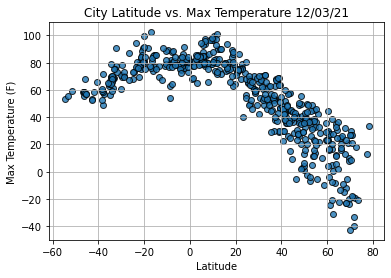

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

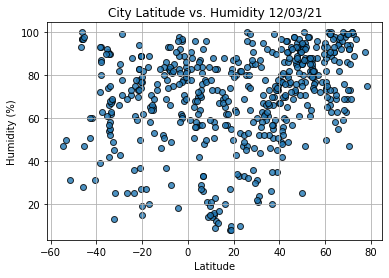

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

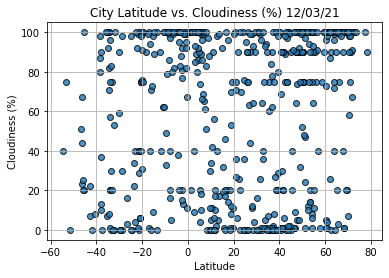

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

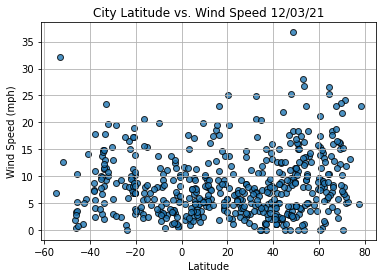

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
index13 = city_data_df.loc[13]
index13

City                   Bredasdorp
Country                        ZA
Date          2021-12-03 14:19:12
Lat                      -34.5322
Lng                       20.0403
Max Temp                    69.28
Humidity                       54
Cloudiness                    100
Wind Speed                  14.85
Name: 13, dtype: object

In [18]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3       True
4      False
       ...  
514     True
515    False
516     True
517     True
518     True
Name: Lat, Length: 519, dtype: bool

In [19]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Saint George,US,2021-12-03 14:19:03,37.1041,-113.5841,53.35,51,1,0.00
5,Tuktoyaktuk,CA,2021-12-03 14:19:05,69.4541,-133.0374,-20.20,69,20,14.97
6,Jamestown,US,2021-12-03 14:16:58,42.0970,-79.2353,35.53,86,90,5.01
7,Port Hardy,CA,2021-12-03 14:19:06,50.6996,-127.4199,39.20,100,75,0.00
9,Talaya,RU,2021-12-03 14:19:08,61.3833,152.7500,-24.18,100,100,0.27
...,...,...,...,...,...,...,...,...,...
513,Shumskiy,RU,2021-12-03 14:23:56,54.8318,99.1328,22.50,82,64,5.03
514,Port Blair,IN,2021-12-03 14:23:57,11.6667,92.7500,80.02,83,17,8.30
516,Inuvik,CA,2021-12-03 14:23:58,68.3499,-133.7218,-22.94,76,1,2.30
517,Nicoya,CR,2021-12-03 14:23:58,10.1483,-85.4520,80.15,78,34,10.13


In [20]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Saint George,US,2021-12-03 14:19:03,37.1041,-113.5841,53.35,51,1,0.00
5,Tuktoyaktuk,CA,2021-12-03 14:19:05,69.4541,-133.0374,-20.20,69,20,14.97
6,Jamestown,US,2021-12-03 14:16:58,42.0970,-79.2353,35.53,86,90,5.01
7,Port Hardy,CA,2021-12-03 14:19:06,50.6996,-127.4199,39.20,100,75,0.00
9,Talaya,RU,2021-12-03 14:19:08,61.3833,152.7500,-24.18,100,100,0.27


In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

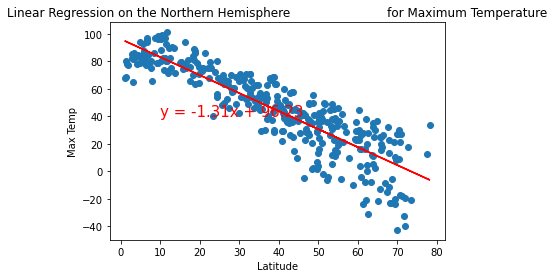

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

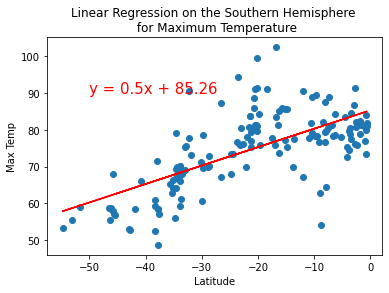

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

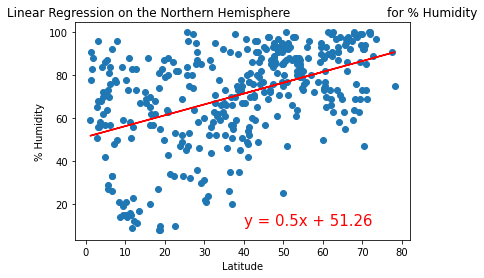

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

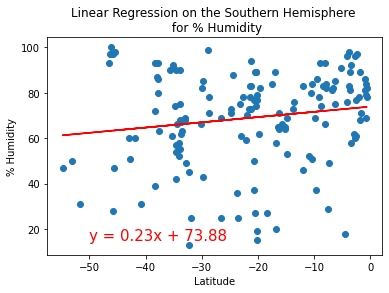

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

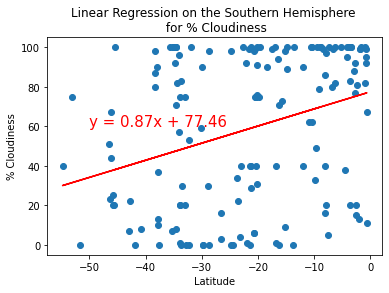

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

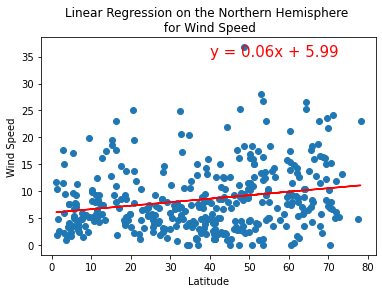

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

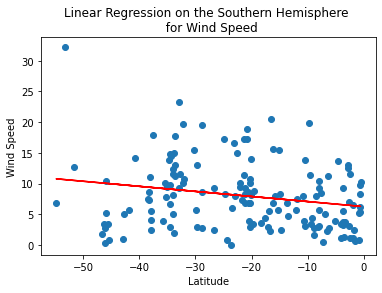

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n  for Wind Speed', 'Wind Speed',(-50,35))